Logistic regression model for predicting if it will rain or no

In [35]:
# Import necessary libraries
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
from sklearn.model_selection import train_test_split, cross_val_score # type: ignore
from sklearn.linear_model import LogisticRegression # type: ignore
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore

In [36]:
# Import the dataset
weather_data = pd.read_csv(r"ADD FILE HERE")
# Drop unnecessary columns from the dataframe
weather_data = weather_data.drop(columns={"Unnamed: 0", "time", "wind direction"})
weather_data.head()

,date,temperature,humidity,wind speed,rainfall
0,2016-07-01,26.35,88.12,6.04,0.123595
1,2016-07-01,26.32,87.99,6.04,0.123595
2,2016-07-01,26.31,87.89,6.11,0.129541
3,2016-07-01,26.34,87.74,6.19,0.133325
4,2016-07-01,26.39,87.56,6.28,0.134949


Taking the average of all the features in the dataframe

In [37]:
daily_avg = weather_data.groupby("date").mean().reset_index()
daily_avg.head()

,date,temperature,humidity,wind speed,rainfall
0,2016-07-01,26.870619,87.819691,7.378454,0.306804
1,2016-07-02,26.751563,88.224375,6.882083,0.202578
2,2016-07-03,26.789479,88.190521,7.118854,0.227011
3,2016-07-04,26.781250,89.115833,6.950417,0.326458
4,2016-07-05,26.787396,87.955312,5.958542,0.165479


We will create a new feature "rainfall_y/n" where 1 indicates yes and 0 indicates no (if the rainfall is >0.15 then we will consider it was raining that day)

In [38]:
daily_avg['rainfall_y/n'] = daily_avg['rainfall'].apply(lambda x: 1 if x >= 0.15 else 0)
daily_avg.head()
# daily_avg.to_csv("weather_lr.csv")

we split the data into test, train and validation classes

In [39]:
daily_avg['rainfall_y/n_next'] = daily_avg['rainfall_y/n'].shift(-1)
daily_avg= daily_avg.dropna()
X=daily_avg[["temperature", "humidity", "wind speed", "rainfall"]]
y=np.array(daily_avg[["rainfall_y/n_next"]])
y=y.reshape(-1)

In [40]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [41]:
# Scale features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [42]:
model_lr=LogisticRegression()
model_lr.fit(x_train,y_train)

LogisticRegression()

In [43]:
y_pred=model_lr.predict(x_test)
y_pred_io=[1 if pred>=0.5 else 0 for pred in y_pred]

In [44]:
accuracy = accuracy_score(y_test, y_pred_io)
precision = precision_score(y_test, y_pred_io)
recall = recall_score(y_test, y_pred_io)
f1 = f1_score(y_test, y_pred_io)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9066666666666666
Precision: 0.75
Recall: 0.7317073170731707
F1 Score: 0.7407407407407408


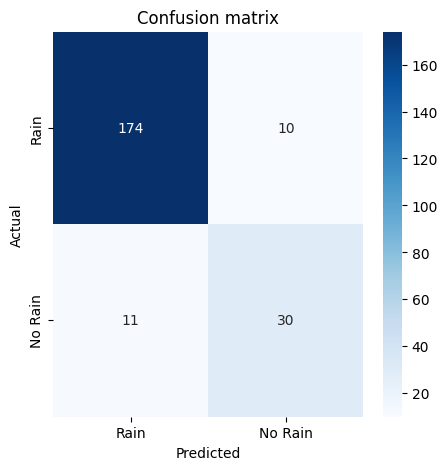

In [45]:
cm= confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,xticklabels=["Rain","No Rain"],yticklabels=["Rain","No Rain"],cmap=plt.cm.Blues,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

The model has a accuracy of around 90.6%, precision of 75%, recall of 73.1% and a F1 score of 74%

The confusion matrix gives the following results:

True Positives (TP): Represent the number of instances that were correctly predicted as "Rain"

False Negatives (FN): Represents the number of instances that were incorrectly predicted as "No Rain" when it was actually "Rain".


False Positives (FP): Represents the number of instances that were incorrectly predicted as "Rain" when it was actually "No Rain".

True Negatives (TN): Represents the number of instances that were correctly predicted as "No Rain".